### importing all required libraries

In [ ]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA, ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('inflation.csv')

In [ ]:
df.head()

,Month,growth
0,Jan-80,0.357119
1,Feb-80,1.642551
2,Mar-80,-0.312444
3,Apr-80,-0.727673
4,May-80,2.198072


In [ ]:
df.tail()

,Month,growth
295,Aug-04,-1.674581
296,Sep-04,-3.505894
297,Oct-04,-3.683395
298,Nov-04,-4.030978
299,Dec-04,-0.849213


In [ ]:
date = pd.date_range(start='01/01/1980', end='12/31/2004', freq='M')

In [ ]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '2004-03-31', '2004-04-30', '2004-05-31', '2004-06-30',
               '2004-07-31', '2004-08-31', '2004-09-30', '2004-10-31',
               '2004-11-30', '2004-12-31'],
              dtype='datetime64[ns]', length=300, freq='M')

### adding business dates to time series as a new column

In [ ]:
df['Month']=date

In [ ]:
df=df.set_index('Month')

In [ ]:
df.head()

,growth
Month,
1980-01-31,0.357119
1980-02-29,1.642551
1980-03-31,-0.312444
1980-04-30,-0.727673
1980-05-31,2.198072


### plotting time series

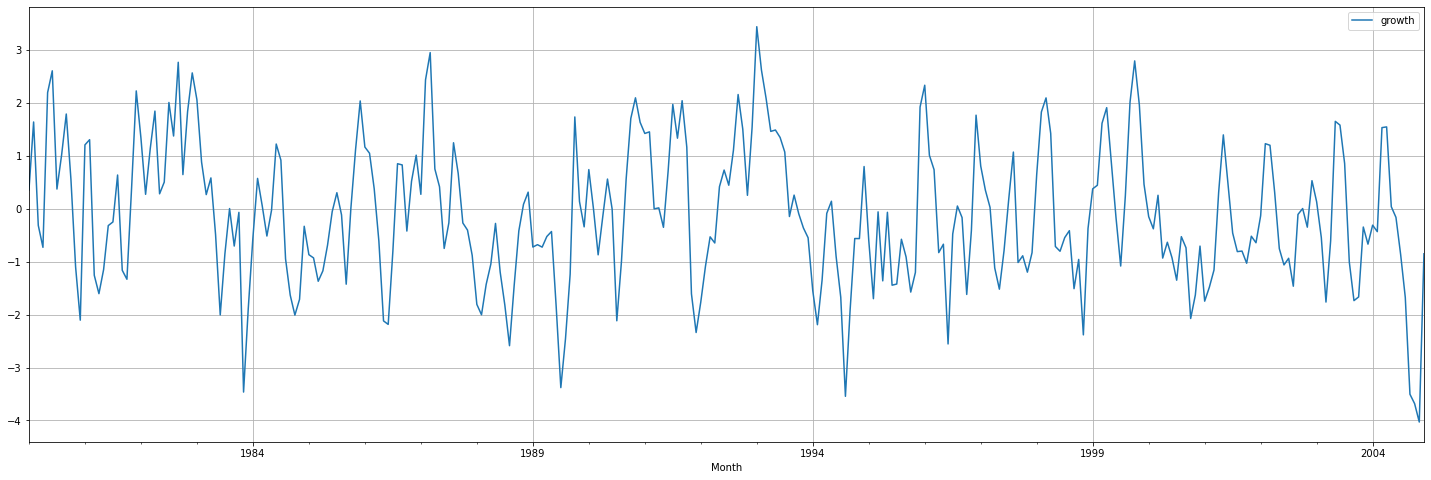

In [ ]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

In [ ]:
df.isna().value_counts()

growth
False     300
dtype: int64

### Decomposing time series

In [ ]:
df_decompose = seasonal_decompose(df, model = 'additive')

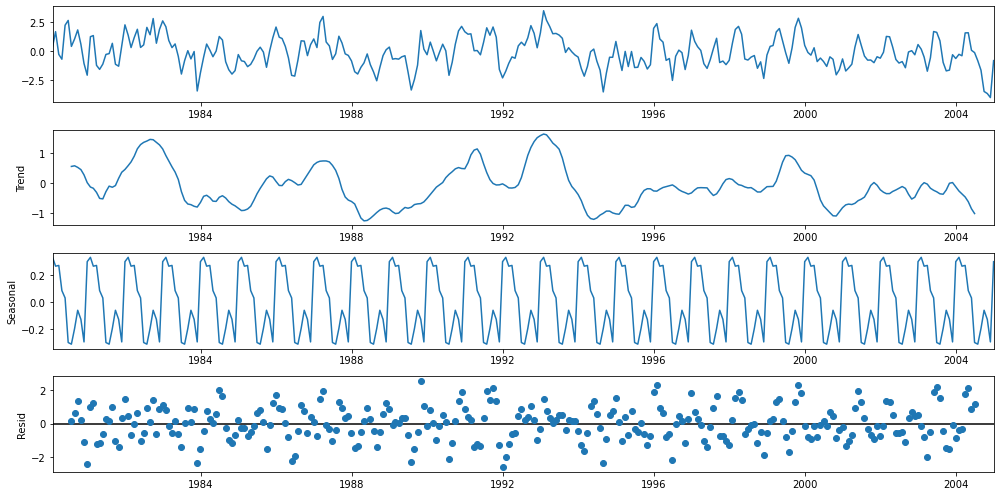

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
df_decompose.plot()
plt.show()

### applying Adfuller test to check the stationarity

In [ ]:
observations= df.values
test_result = adfuller(observations)

In [ ]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -9.251805
p-value: 0.000000
Critical Values:
	1%: -3.45249
	5%: -2.87129
	10%: -2.57196


### test results confirms that the series is stationary

## Building ARMA model

### To find p and q values of AR() and MA() processes, lets plot ACF and PACF

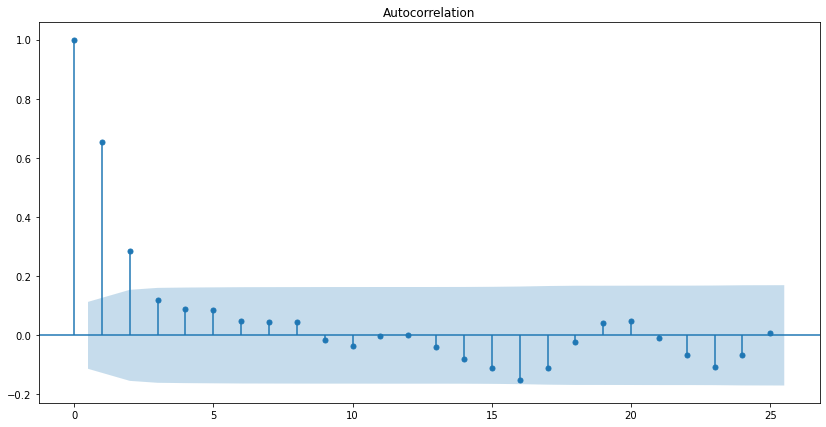

In [ ]:
plot_acf(df);

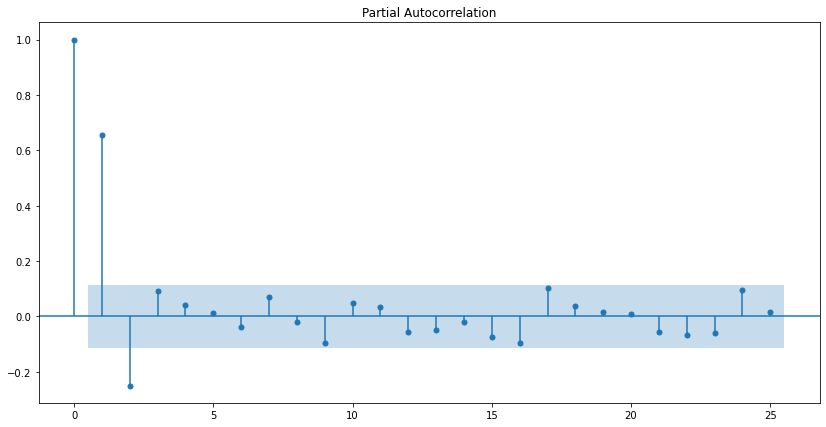

In [ ]:
plot_pacf(df);

### Can select AR(2) and MA(2) process to build ARMA model

### splittng time series into training and testing sets

In [ ]:
train_end=datetime(2002,12,31)
test_end=datetime(2004,12,31)

In [ ]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [ ]:
train.shape

(276, 1)

### building ARMA model

In [ ]:
model=ARMA(train,(2,2))

In [ ]:
model_fit=model.fit()

In [ ]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 growth   No. Observations:                  276
Model:                     ARMA(2, 2)   Log Likelihood                -379.941
Method:                       css-mle   S.D. of innovations              0.957
Date:                Sat, 06 Mar 2021   AIC                            771.883
Time:                        12:42:44   BIC                            793.605
Sample:                    01-31-1980   HQIC                           780.599
                         - 12-31-2002                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0717      0.138     -0.518      0.604      -0.343       0.199
ar.L1.growth     0.2944      1.378      0.214      0.831      -2.406       2.995
ar.L2.growth     0.0485      0.606      0.08

### predicting forecasts using the model

In [ ]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [ ]:
pred_end

Timestamp('2004-12-31 00:00:00')

In [ ]:
predictions=model_fit.predict(start=pred_start, end=pred_end)

In [ ]:
predictions1=model_fit.forecast(12)

In [ ]:
predictions1

(array([ 0.49932869,  0.17820247,  0.02956525, -0.0297516 , -0.05441616,
        -0.06455133, -0.06873015, -0.07045145, -0.07116066, -0.07145286,
        -0.07157324, -0.07162284]),
 array([0.95739181, 1.23314259, 1.27835866, 1.28566429, 1.28691045,
        1.28712136, 1.28715718, 1.28716326, 1.28716429, 1.28716447,
        1.2871645 , 1.2871645 ]),
 array([[-1.37712477,  2.37578216],
        [-2.23871259,  2.59511753],
        [-2.47597168,  2.53510218],
        [-2.5496073 ,  2.4901041 ],
        [-2.57671429,  2.46788198],
        [-2.58726285,  2.45816018],
        [-2.59151187,  2.45405157],
        [-2.59324508,  2.45234219],
        [-2.59395632,  2.45163499],
        [-2.59424886,  2.45134315],
        [-2.5943693 ,  2.45122282],
        [-2.59441891,  2.45117323]]))

### lets plot actual series and forecast

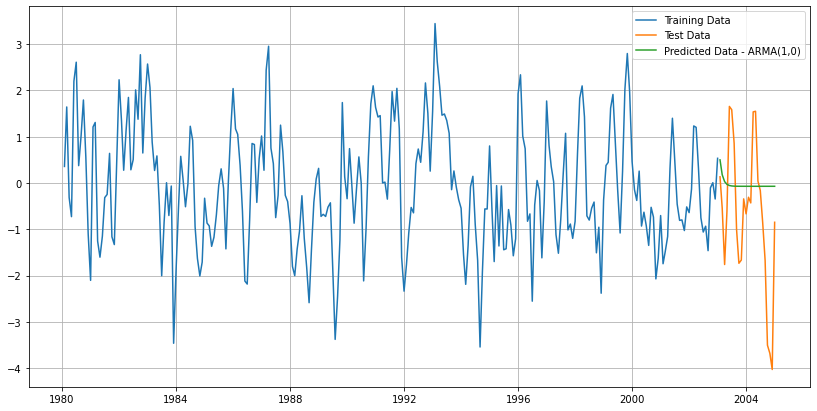

In [ ]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predictions,label='Predicted Data - ARMA(1,0)')
plt.legend(loc='best')
plt.grid();

### finding residuals

In [ ]:
residuals = test.growth - predictions

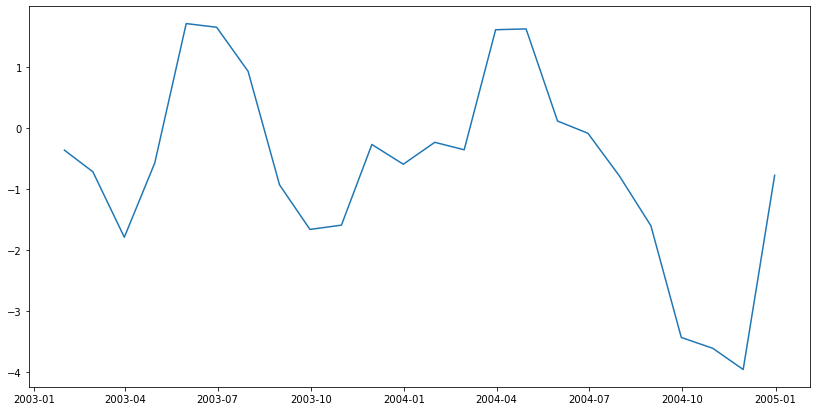

In [ ]:
plt.plot(residuals)
plt.show()

### accuracy matrix

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test.values,predictions.values,squared=False)

1.6712248836849881

### residual q-q plot for to check model performance 

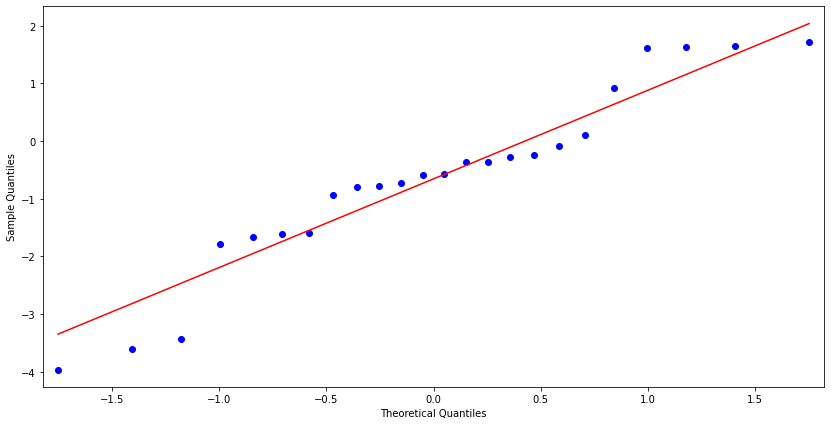

In [ ]:
qqplot(residuals,line="s");

# End